<a href="https://colab.research.google.com/github/Maruf346/AI-ML-with-python/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training a Neural Network using Backpropagation**

**Importing necessary libraries, loading iris dataset and splitting into training and testing.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading dataset
data = load_iris ()
# Dividing the dataset into target variable and features
X=data.data
y=data.target

# Splitting dataset into training and testing
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size =20, random_state =4)
y_train = y_train.reshape(( y_train.shape[0], 1))
y_test = y_test.reshape ((y_test.shape[0], 1))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(130, 4)
(20, 4)
(130, 1)
(20, 1)


**Now in the next step, we have to start initializing the hyperparameters. We will input the learning rate, iterations, input size, number of hidden layers, and number of output layers.**

In [ ]:
learning_rate = 0.2
iterations = 10000
N = y_train.size

# Input features
input_size = 4

# Hidden layers
hidden_size = 2

# Output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

**Randomly initialize the weights.**

In [ ]:
np.random.seed (10)

# Hidden layer
W1 = np.random.normal(scale =0.5, size=(input_size , hidden_size))

# Output layer
W2 = np.random.normal(scale =0.5, size=( hidden_size , output_size))


**Creating helper functions such as mean squared error, accuracy and sigmoid.**

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred , y_true):
  return ((y_pred - y_true)**2).sum() / (2* y_pred.size)

def accuracy(y_pred , y_true):
  acc = y_pred.argmax(axis =1) == y_true.argmax(axis =1)
  return acc.mean()

**Next is building the Backpropogation model. We will create a for loop for a given number of iterations and will update the weights in each iteration. The model will go through three phases feedforward propagation, the error calculation phase, and the backpropagation phase.**

In [ ]:
for itr in range(iterations):

# Implementing feedforward propagation on hidden layer
  Z1 = np.dot(X_train , W1)
  A1 = sigmoid(Z1)

# Implementing feed forward propagation on output layer
  Z2 = np.dot(A1, W2)
  A2 = sigmoid(Z2)


# Calculating the error
  mse = mean_squared_error(A2, y_train)
  acc = accuracy(A2, y_train)

  results = pd.concat([results, pd.DataFrame([{"mse":mse , "accuracy":acc}])], ignore_index=True)


# Backpropagation phase
  E1 = A2 - y_train
  dW1 = E1 * A2 * (1 - A2)

  E2 = np.dot(dW1 , W2.T)
  dW2 = E2 * A1 * (1 - A1)


# Updating the weights
  W2_update = np.dot(A1.T, dW1) / N
  W1_update = np.dot(X_train.T, dW2) / N

  W2 = W2 - learning_rate * W2_update
  W1 = W1 - learning_rate * W1_update


/tmp/ipython-input-137-3720061712.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{"mse":mse , "accuracy":acc}])], ignore_index=True)


**Now we will plot the mean squared error using pandas plot() function.**

<Axes: title={'center': 'Mean Squared Error'}>

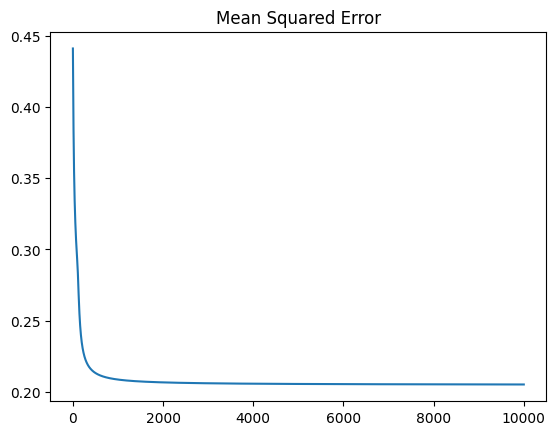

In [ ]:
results.mse.plot(title="Mean Squared Error")


**And accuracy using the pandas plot() function.**

<Axes: title={'center': 'Accuracy'}>

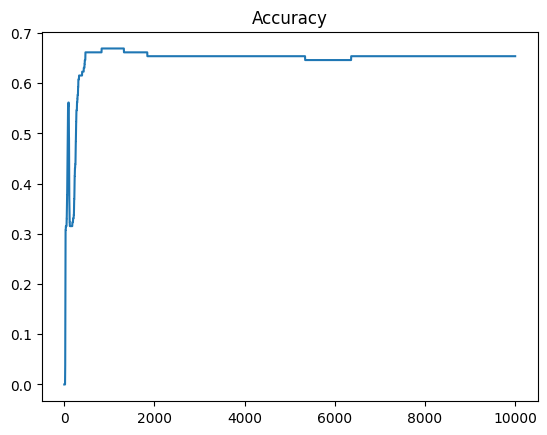

In [ ]:
results.accuracy.plot(title="Accuracy")

**Now we will calculate the accuracy of the model.**

In [ ]:
Z1 = np.dot(X_test , W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.85


# **Please code yourself and write a report based on your findings:**
1. Experiment with a different number of hidden layer neurons and report your results.
2. Experiment with different learning rates and report your results.
3. Experiment with a different number of iterations and report your results.
4. Modify the above code and Experiment with MNIST dataset (google yourself). Report your
optimal Neural Network and analyze the experimental results.

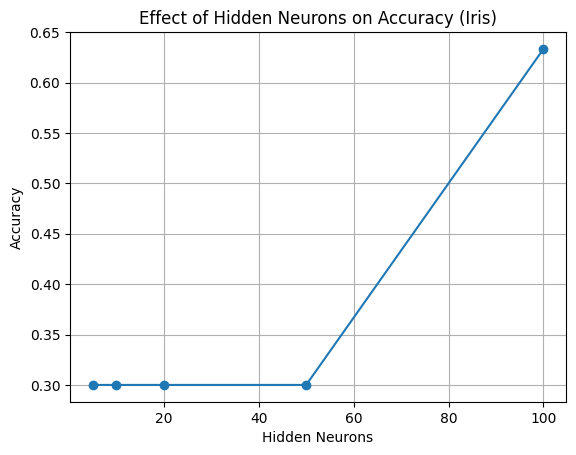

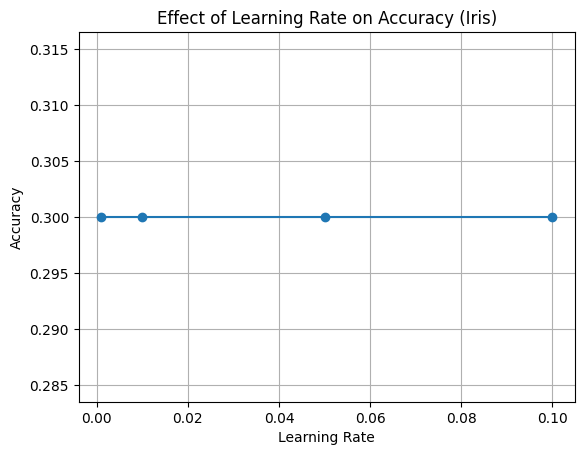

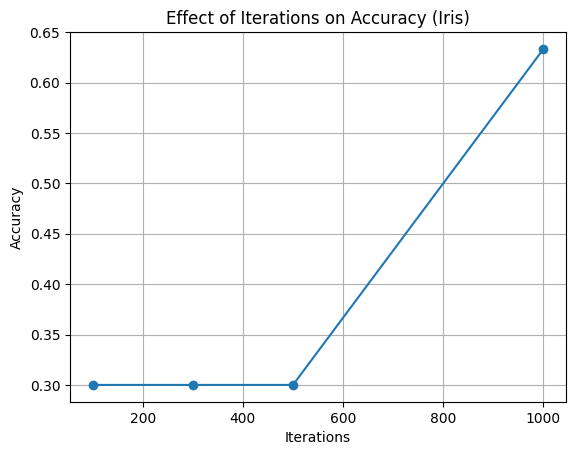

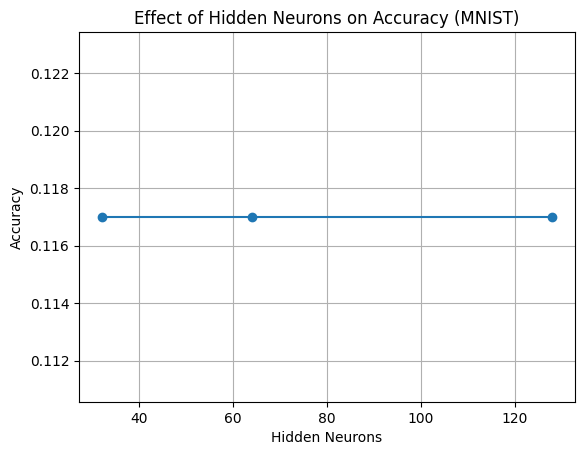

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# =============================
# Basic Neural Network (Backprop from scratch)
# =============================
class SimpleNeuralNet:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, iterations=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate
        self.iterations = iterations

        # Weight initialization
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

    def fit(self, X, y):
        m = X.shape[0]
        for _ in range(self.iterations):
            # Forward pass
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.sigmoid(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.softmax(Z2)

            # Backward pass
            dZ2 = A2 - y
            dW2 = np.dot(A1.T, dZ2) / m
            db2 = np.sum(dZ2, axis=0).reshape(1, -1) / m

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = np.multiply(dA1, self.sigmoid_derivative(A1))
            dW1 = np.dot(X.T, dZ1) / m
            db1 = np.sum(dZ1, axis=0).reshape(1, -1) / m


            # Update weights
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.softmax(Z2)
        return np.argmax(A2, axis=1)

    def accuracy(self, X, y_true_labels):
        preds = self.predict(X)
        return np.mean(preds == y_true_labels)


# =============================
# Data Preprocessing (Iris dataset first)
# =============================
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, y_train_labels, y_test_labels = train_test_split(
    X_scaled, y_encoded, y, test_size=0.2, random_state=42
)

# =============================
# 1. Experiment: Different hidden neurons
# =============================
neurons_list = [5, 10, 20, 50, 100]
acc_neurons = []

for neurons in neurons_list:
    model = SimpleNeuralNet(input_size=4, hidden_size=neurons, output_size=3, learning_rate=0.01, iterations=500)
    model.fit(X_train, y_train)
    acc = model.accuracy(X_test, y_test_labels.flatten())
    acc_neurons.append(acc)

plt.figure()
plt.plot(neurons_list, acc_neurons, marker='o')
plt.xlabel("Hidden Neurons")
plt.ylabel("Accuracy")
plt.title("Effect of Hidden Neurons on Accuracy (Iris)")
plt.grid(True)
plt.show()

# =============================
# 2. Experiment: Different learning rates
# =============================
lr_list = [0.001, 0.01, 0.05, 0.1]
acc_lr = []

for lr in lr_list:
    model = SimpleNeuralNet(input_size=4, hidden_size=20, output_size=3, learning_rate=0.01, iterations=500)
    model.fit(X_train, y_train)
    acc = model.accuracy(X_test, y_test_labels.flatten())
    acc_lr.append(acc)

plt.figure()
plt.plot(lr_list, acc_lr, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate on Accuracy (Iris)")
plt.grid(True)
plt.show()

# =============================
# 3. Experiment: Different iterations
# =============================
iter_list = [100, 300, 500, 1000]
acc_iter = []

for it in iter_list:
    model = SimpleNeuralNet(input_size=4, hidden_size=20, output_size=3, learning_rate=0.01, iterations=it)
    model.fit(X_train, y_train)
    acc = model.accuracy(X_test, y_test_labels.flatten())
    acc_iter.append(acc)

plt.figure()
plt.plot(iter_list, acc_iter, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Effect of Iterations on Accuracy (Iris)")
plt.grid(True)
plt.show()

# =============================
# 4. Experiment: MNIST dataset
# =============================
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], -1) / 255.0
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], -1) / 255.0

encoder = OneHotEncoder()
y_train_mnist_enc = encoder.fit_transform(y_train_mnist.reshape(-1, 1))
y_test_mnist_enc = encoder.transform(y_test_mnist.reshape(-1, 1))

neurons_list_mnist = [32, 64, 128]
acc_mnist = []

for neurons in neurons_list_mnist:
    model = SimpleNeuralNet(input_size=784, hidden_size=neurons, output_size=10, learning_rate=0.05, iterations=50)
    model.fit(X_train_mnist[:10000], y_train_mnist_enc[:10000])  # smaller subset for speed
    acc = model.accuracy(X_test_mnist[:2000], y_test_mnist[:2000])
    acc_mnist.append(acc)

plt.figure()
plt.plot(neurons_list_mnist, acc_mnist, marker='o')
plt.xlabel("Hidden Neurons")
plt.ylabel("Accuracy")
plt.title("Effect of Hidden Neurons on Accuracy (MNIST)")
plt.grid(True)
plt.show()